In [13]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from Stargazer1.stargazer import Stargazer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
helicopter = pd.read_excel('/Users/kissr/Downloads/helicopter_ez_gengov.xlsx', sheet_name='goodcountries_nooutliers') # elérési út megadása, az outlieres verzióhoz sheet_name='goodcountries_justvalues'
helicopter['összes eset (1000 főre jutó)']=helicopter['összes eset']/helicopter['népesség']*1000
helicopter['összes halál (1000 főre jutó)']=helicopter['összes halál']/helicopter['népesség']*1000

In [ ]:
# Szűrt df, ha külön kell valamelyik minta (a negyedéves GDP/infláció, jegybanki alapkamat kontrollra is elérhető, Eurozóna nélküli stb.
# Alaphelyzetben kikapcsolva, #

#helicopter = helicopter[helicopter['negyedéves GDP kontroll'].notna()]
#helicopter = helicopter[helicopter['negyedéves infláció kontroll'].notna()]
#helicopter = helicopter[helicopter['jegybanki alapkamat változás'].notna()]
#helicopter = helicopter[helicopter['Eurozone']=='no']

In [3]:
# A gdp_model, infl_model elemeit CSERÉLGETNI KELL A TAGOKAT AZ ADOTT BECSLÉSEK FÜGGVÉNYÉBEN!
# Ha negyedéves GDP kontrollal megy a becslés, akkor '2019 reál GDP növekedés' és 'negyedéves GDP kontroll' a kontroll.
# Ha negyedéves GDP kontroll nélküli, akkor 2020 és 2019-2021 esetében (heli_y[0] és heli_y[1]) csak '2019 reál GDP növekedés', 2021-től '2020 reál GDP növekedés' is kontroll.
# Ha van negyedéves inflációs kontroll, akkor 'negyedéves infláció kontroll' is bekerül a modellbe.
# A regressziós startgazer output táblában a .covariate_order mindig a megfelelő modell elemeit kell, hogy tartalmazza (első 3 változó ugyanaz mindig, utána a gdp_model3/infl_model3 változói, majd const).

heli_y = helicopter[['GDP 2020', 'GDP 2019-2021', 'reál GDP növekedés (1 év)', 'reál GDP növekedés (2 év)', 'reál GDP növekedés (3 év)', 'infláció 2020', 'infláció 2019-2021', 'infláció (1 év)', 'infláció (2 év)', 'infláció (3 év)']]
gdp_model1 = helicopter[['2019 reál GDP növekedés' ,'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)' ]]
gdp_model2 = helicopter[['2019 reál GDP növekedés', 'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya']]
gdp_model3 = helicopter[['2019 reál GDP növekedés','szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya', 'nettó energiaimport', 'kormányzati hatékonyság index', 'jegybanki alapkamat változás']]
infl_model1 = helicopter[['átlagos infláció (2009-2019)','szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)']]
infl_model2 = helicopter[['átlagos infláció (2009-2019)', 'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya']]
infl_model3 = helicopter[['átlagos infláció (2009-2019)', 'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya', 'nettó energiaimport', 'kormányzati hatékonyság index', 'jegybanki alapkamat változás']]
helicopter.iloc[:, 3:] = helicopter.iloc[:, 3:].apply(lambda x:pd.to_numeric(x, errors='coerce'))

C:\Users\kissr\AppData\Local\Temp\ipykernel_14280\4245807661.py:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  helicopter.iloc[:, 3:] = helicopter.iloc[:, 3:].apply(lambda x:pd.to_numeric(x, errors='coerce'))


<Axes: >

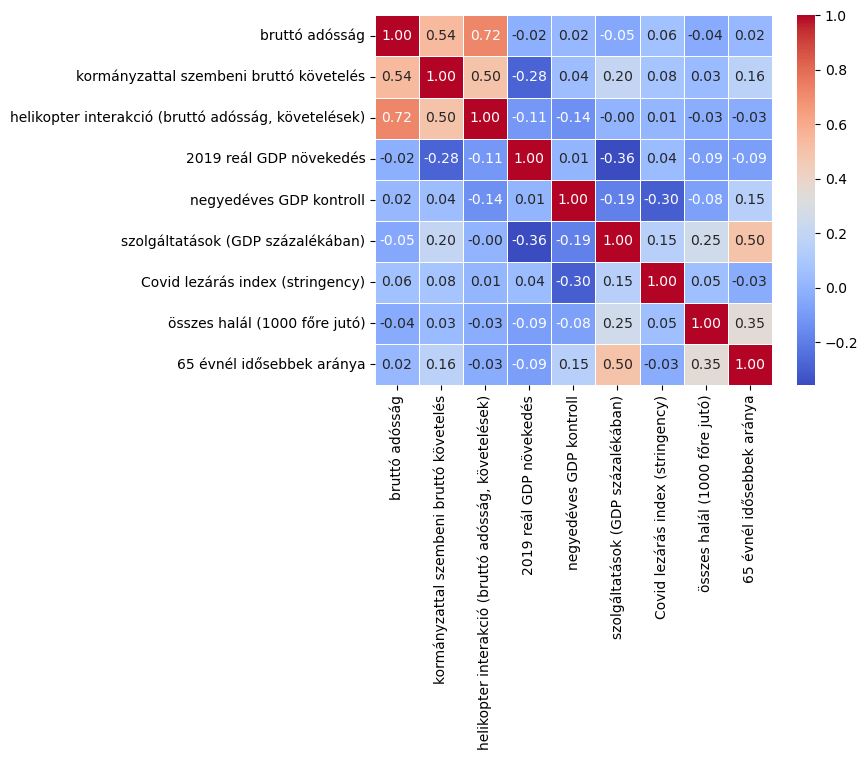

In [16]:
coll = helicopter[['bruttó adósság','kormányzattal szembeni bruttó követelés', 'helikopter interakció (bruttó adósság, követelések)','2019 reál GDP növekedés','negyedéves GDP kontroll', 'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya']]
corr_matrix = coll.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [4]:
# INTERACTION TERMS - GDP

#gross debt, total asset

gdp_year = 0

res_1 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['jegybank mérlegfőösszeg']] ,gdp_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_2 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (bruttó adósság, mérlegfőösszeg)']] ,gdp_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_3 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (bruttó adósság, mérlegfőösszeg)']] ,gdp_model2], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_4 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (bruttó adósság, mérlegfőösszeg)']] ,gdp_model3], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
stargazer = Stargazer([res_1, res_2, res_3, res_4])
stargazer.show_degrees_of_freedom(False)
stargazer.rename_covariates({'const': 'konstans'})
stargazer.covariate_order(['bruttó adósság', 'jegybank mérlegfőösszeg', 'helikopter interakció (bruttó adósság, mérlegfőösszeg)', '2019 reál GDP növekedés',  'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya', 'nettó energiaimport', 'kormányzati hatékonyság index', 'jegybanki alapkamat változás', 'const'])
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{4}{c}{\textit{Függő változó: GDP 2020}} \
\cr \cline{2-5}
\\[-1.8ex] & (1) & (2) & (3) & (4) \\
\hline \\[-1.8ex]
 bruttó adósság & -0.084$^{**}$ & -0.032$^{}$ & -0.021$^{}$ & -0.022$^{}$ \\
& (0.039) & (0.041) & (0.045) & (0.074) \\
 jegybank mérlegfőösszeg & 0.023$^{}$ & 0.024$^{}$ & -0.021$^{}$ & -0.188$^{}$ \\
& (0.092) & (0.091) & (0.111) & (0.146) \\
 helikopter interakció (bruttó adósság, mérlegfőösszeg) & & -0.005$^{**}$ & -0.005$^{**}$ & 0.016$^{}$ \\
& & (0.002) & (0.002) & (0.014) \\
 2019 reál GDP növekedés & 0.429$^{**}$ & 0.388$^{*}$ & 0.414$^{*}$ & 0.789$^{**}$ \\
& (0.214) & (0.222) & (0.237) & (0.312) \\
 szolgáltatások (GDP százalékában) & -0.176$^{***}$ & -0.181$^{***}$ & -0.212$^{**}$ & -0.029$^{}$ \\
& (0.060) & (0.061) & (0.086) & (0.095) \\
 Covid lezárás index (stringency) & -0.135$^{***}$ & -0.133$^{***}$ & -0.144$^{***}$ & -0.144$^{*}$ \

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{4}{c}{\textit{Függő változó: reál GDP növekedés (2 év)}} \
\cr \cline{2-5}
\\[-1.8ex] & (1) & (2) & (3) & (4) \\
\hline \\[-1.8ex]
 bruttó adósság & 0.036$^{}$ & 0.114$^{}$ & 0.106$^{}$ & 0.175$^{*}$ \\
& (0.065) & (0.077) & (0.087) & (0.090) \\
 kormányzattal szembeni bruttó követelés & -0.265$^{}$ & -0.210$^{}$ & -0.246$^{}$ & -0.311$^{}$ \\
& (0.176) & (0.172) & (0.196) & (0.187) \\
 helikopter interakció (bruttó adósság, követelések) & & -0.010$^{**}$ & -0.009$^{**}$ & 0.024$^{}$ \\
& & (0.004) & (0.004) & (0.024) \\
 2019 reál GDP növekedés & 0.804$^{***}$ & 0.742$^{***}$ & 0.765$^{**}$ & 0.811$^{**}$ \\
& (0.261) & (0.263) & (0.318) & (0.338) \\
 szolgáltatások (GDP százalékában) & 0.208$^{***}$ & 0.201$^{***}$ & 0.278$^{***}$ & -0.091$^{}$ \\
& (0.066) & (0.066) & (0.104) & (0.119) \\
 Covid lezárás index (stringency) & 0.153$^{**}$ & 0.155$^{**}$ & 0.089$

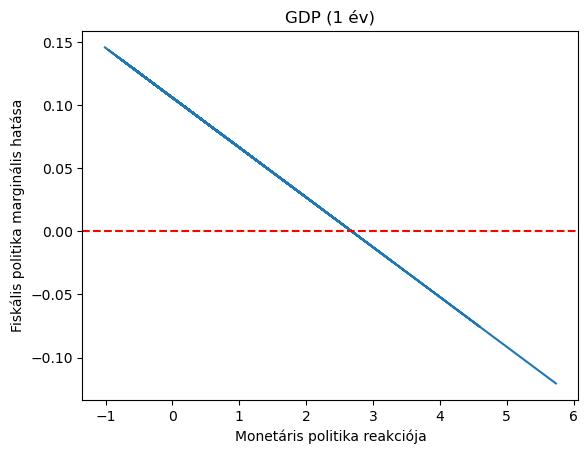

In [11]:
# INTERACTION TERMS - GDP

#gross debt, claims

gdp_year = 3

res_1 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['kormányzattal szembeni bruttó követelés']] ,gdp_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_2 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (bruttó adósság, követelések)']] ,gdp_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_3 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (bruttó adósság, követelések)']] ,gdp_model2], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_4 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (bruttó adósság, követelések)']] ,gdp_model3], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
stargazer = Stargazer([res_1, res_2, res_3, res_4])
stargazer.show_degrees_of_freedom(False)
stargazer.rename_covariates({'const': 'konstans'})
stargazer.covariate_order(['bruttó adósság', 'kormányzattal szembeni bruttó követelés', 'helikopter interakció (bruttó adósság, követelések)', '2019 reál GDP növekedés', 'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya', 'nettó energiaimport', 'kormányzati hatékonyság index', 'jegybanki alapkamat változás', 'const'])
print(stargazer.render_latex())

betas = res_3.params[1:4]

yaxes_fis = betas[0]+betas[2]*(helicopter['kormányzattal szembeni bruttó követelés']-np.nanmean(helicopter['kormányzattal szembeni bruttó követelés']))
xaxes_fis = (helicopter[['kormányzattal szembeni bruttó követelés']]-np.nanmean(helicopter[['kormányzattal szembeni bruttó követelés']]))/(np.nanvar(helicopter[['kormányzattal szembeni bruttó követelés']])**0.5)

plot=plt.plot(xaxes_fis,yaxes_fis)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Monetáris politika reakciója')
plt.ylabel('Fiskális politika marginális hatása')
plt.title('GDP (1 év)')

In [ ]:
yaxes_mon = betas[1]+betas[2]*(helicopter['bruttó adósság']-np.nanmean(helicopter['bruttó adósság']))
xaxes_mon = (helicopter[['bruttó adósság']]-np.nanmean(helicopter[['bruttó adósság']]))/(np.nanvar(helicopter[['bruttó adósság']])**0.5)

plot=plt.plot(xaxes_mon,yaxes_mon)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fiskális politika reakciója')
plt.ylabel('Monetáris politika marginális hatása')
plt.title('GDP (1 év)')

In [5]:
# INTERACTION TERMS - GDP

#gov exp, total asset

gdp_year = 0

res_1 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['jegybank mérlegfőösszeg']] ,gdp_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_2 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (kiadások, mérlegfőösszeg)']] ,gdp_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_3 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (kiadások, mérlegfőösszeg)']] ,gdp_model2], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_4 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (kiadások, mérlegfőösszeg)']] ,gdp_model3], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
stargazer = Stargazer([res_1, res_2, res_3, res_4])
stargazer.show_degrees_of_freedom(False)
stargazer.rename_covariates({'const': 'konstans'})
stargazer.covariate_order(['kormányzati kiadások', 'jegybank mérlegfőösszeg', 'helikopter interakció (kiadások, mérlegfőösszeg)', '2019 reál GDP növekedés', 'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya', 'nettó energiaimport', 'kormányzati hatékonyság index', 'jegybanki alapkamat változás', 'const'])
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{4}{c}{\textit{Függő változó: GDP 2020}} \
\cr \cline{2-5}
\\[-1.8ex] & (1) & (2) & (3) & (4) \\
\hline \\[-1.8ex]
 kormányzati kiadások & 0.117$^{}$ & -0.007$^{}$ & 0.118$^{}$ & 0.152$^{}$ \\
& (0.122) & (0.188) & (0.139) & (0.217) \\
 jegybank mérlegfőösszeg & -0.085$^{}$ & -0.068$^{}$ & -0.113$^{}$ & -0.207$^{**}$ \\
& (0.090) & (0.084) & (0.070) & (0.096) \\
 helikopter interakció (kiadások, mérlegfőösszeg) & & 0.021$^{}$ & 0.035$^{**}$ & 0.052$^{**}$ \\
& & (0.020) & (0.016) & (0.026) \\
 2019 reál GDP növekedés & 0.488$^{**}$ & 0.538$^{**}$ & 0.551$^{**}$ & 0.780$^{**}$ \\
& (0.202) & (0.212) & (0.215) & (0.322) \\
 szolgáltatások (GDP százalékában) & -0.188$^{***}$ & -0.182$^{***}$ & -0.211$^{***}$ & -0.028$^{}$ \\
& (0.057) & (0.057) & (0.077) & (0.082) \\
 Covid lezárás index (stringency) & -0.133$^{***}$ & -0.141$^{***}$ & -0.140$^{***}$ & -0.145$^{**}$ 

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{4}{c}{\textit{Függő változó: reál GDP növekedés (2 év)}} \
\cr \cline{2-5}
\\[-1.8ex] & (1) & (2) & (3) & (4) \\
\hline \\[-1.8ex]
 kormányzati kiadások & 0.145$^{}$ & 0.050$^{}$ & 0.328$^{}$ & 0.362$^{}$ \\
& (0.312) & (0.405) & (0.418) & (0.427) \\
 kormányzattal szembeni bruttó követelés & -0.206$^{}$ & -0.281$^{}$ & -0.163$^{}$ & -0.329$^{}$ \\
& (0.247) & (0.190) & (0.197) & (0.203) \\
 helikopter interakció (kiadások, követelések) & & 0.051$^{}$ & 0.015$^{}$ & 0.051$^{}$ \\
& & (0.063) & (0.066) & (0.065) \\
 2019 reál GDP növekedés & 0.656$^{*}$ & 0.750$^{*}$ & 0.623$^{}$ & 0.858$^{*}$ \\
& (0.349) & (0.377) & (0.474) & (0.465) \\
 negyedéves GDP kontroll & -26.164$^{***}$ & -23.819$^{***}$ & -25.134$^{**}$ & -17.705$^{}$ \\
& (8.521) & (8.227) & (11.556) & (12.041) \\
 szolgáltatások (GDP százalékában) & 0.210$^{**}$ & 0.225$^{**}$ & 0.294$^{**}$ & 0.003$

Text(0, 0.5, 'Fiskális politika marginális hatása')

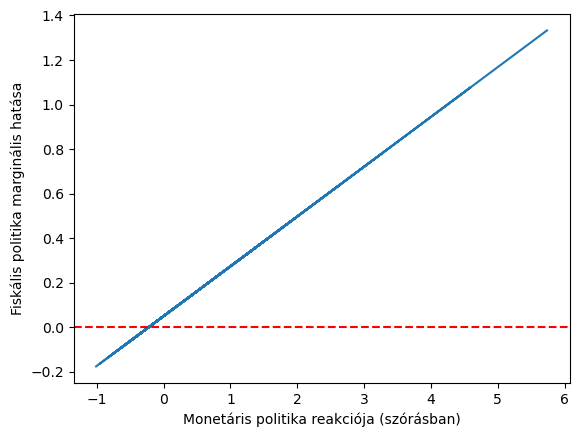

In [7]:
# INTERACTION TERMS - GDP

#gov exp, claims

#helicopter['helikopter interakció (kiadások, követelések)']=helicopter['kormányzati kiadások']*helicopter['kormányzattal szembeni bruttó követelés']

gdp_year = 3

res_1 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['kormányzattal szembeni bruttó követelés']] ,gdp_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_2 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (kiadások, követelések)']] ,gdp_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_3 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (kiadások, követelések)']] ,gdp_model2], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_4 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (kiadások, követelések)']] ,gdp_model3], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
stargazer = Stargazer([res_1, res_2, res_3, res_4])
stargazer.show_degrees_of_freedom(False)
stargazer.rename_covariates({'const': 'konstans'})
stargazer.covariate_order(['kormányzati kiadások', 'kormányzattal szembeni bruttó követelés', 'helikopter interakció (kiadások, követelések)', '2019 reál GDP növekedés', 'negyedéves GDP kontroll', 'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya', 'nettó energiaimport', 'kormányzati hatékonyság index', 'jegybanki alapkamat változás', 'const'])
print(stargazer.render_latex())

betas = res_2.params[1:4]

yaxes_fis = betas[0]+betas[2]*(helicopter['kormányzattal szembeni bruttó követelés']-np.nanmean(helicopter['kormányzattal szembeni bruttó követelés']))
xaxes_fis = (helicopter[['kormányzattal szembeni bruttó követelés']]-np.nanmean(helicopter[['kormányzattal szembeni bruttó követelés']]))/(np.nanvar(helicopter[['kormányzattal szembeni bruttó követelés']])**0.5)

plot=plt.plot(xaxes_fis,yaxes_fis)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Monetáris politika reakciója (szórásban)')
plt.ylabel('Fiskális politika marginális hatása')

In [ ]:
yaxes_mon = betas[1]+betas[2]*(helicopter['kormányzati kiadások']-np.nanmean(helicopter['kormányzati kiadások']))
xaxes_mon = (helicopter[['kormányzati kiadások']]-np.nanmean(helicopter[['kormányzati kiadások']]))/(np.nanvar(helicopter[['kormányzati kiadások']])**0.5)

plot=plt.plot(xaxes_mon,yaxes_mon)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fiskális politika reakciója')
plt.ylabel('Monetáris politika marginális hatása')
plt.title('GDP (1 év)')

In [ ]:
# INTERACTION TERMS - GDP

#IMF, total asset

gdp_year = 2

res_1 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['jegybank mérlegfőösszeg']] ,gdp_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_2 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (IMF, mérlegfőösszeg)']] ,gdp_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_3 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (IMF, mérlegfőösszeg)']] ,gdp_model2], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_4 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (IMF, mérlegfőösszeg)']] ,gdp_model3], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
stargazer = Stargazer([res_1, res_2, res_3, res_4])
stargazer.show_degrees_of_freedom(False)
stargazer.rename_covariates({'const': 'konstans'})
stargazer.covariate_order(['IMF fiskális kiadások (összes)', 'jegybank mérlegfőösszeg', 'helikopter interakció (IMF, mérlegfőösszeg)', '2019 reál GDP növekedés', 'negyedéves GDP kontroll', 'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya', 'nettó energiaimport', 'kormányzati hatékonyság index', 'jegybanki alapkamat változás', 'const'])
print(stargazer.render_latex())

In [ ]:
# INTERACTION TERMS - GDP

#IMF, claims

gdp_year = 4

res_1 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['kormányzattal szembeni bruttó követelés']] ,gdp_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_2 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (IMF, követelések)']] ,gdp_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_3 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (IMF, követelések)']] ,gdp_model2], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_4 = sm.OLS(heli_y.iloc[:,gdp_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (IMF, követelések)']] ,gdp_model3], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
stargazer = Stargazer([res_1, res_2, res_3, res_4])
stargazer.show_degrees_of_freedom(False)
stargazer.rename_covariates({'const': 'konstans'})
stargazer.covariate_order(['IMF fiskális kiadások (összes)', 'kormányzattal szembeni bruttó követelés', 'helikopter interakció (IMF, követelések)', '2019 reál GDP növekedés', 'negyedéves GDP kontroll', 'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya', 'nettó energiaimport', 'kormányzati hatékonyság index', 'jegybanki alapkamat változás', 'const'])
print(stargazer.render_latex())

betas = res_3.params[1:4]

yaxes_fis = betas[0]+betas[2]*(helicopter['kormányzattal szembeni bruttó követelés']-np.nanmean(helicopter['kormányzattal szembeni bruttó követelés']))
xaxes_fis = (helicopter[['kormányzattal szembeni bruttó követelés']]-np.nanmean(helicopter[['kormányzattal szembeni bruttó követelés']]))/(np.nanvar(helicopter[['kormányzattal szembeni bruttó követelés']])**0.5)

plot=plt.plot(xaxes_fis,yaxes_fis)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Monetáris politika reakciója')
plt.ylabel('Fiskális politika marginális hatása')
plt.title('GDP (1 év)')

In [ ]:
yaxes_mon = betas[1]+betas[2]*(helicopter['IMF fiskális kiadások (összes)']-np.nanmean(helicopter['IMF fiskális kiadások (összes)']))
xaxes_mon = (helicopter[['IMF fiskális kiadások (összes)']]-np.nanmean(helicopter[['IMF fiskális kiadások (összes)']]))/(np.nanvar(helicopter[['IMF fiskális kiadások (összes)']])**0.5)

plot=plt.plot(xaxes_mon,yaxes_mon)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fiskális politika reakciója')
plt.ylabel('Monetáris politika marginális hatása')
plt.title('GDP (1 év)')

In [6]:
# INTERACTION TERMS - INFLATION

#gross debt, total asset

infl_year = 5

res_1 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['jegybank mérlegfőösszeg']] ,infl_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_2 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (bruttó adósság, mérlegfőösszeg)']] ,infl_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_3 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (bruttó adósság, mérlegfőösszeg)']] ,infl_model2], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_4 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (bruttó adósság, mérlegfőösszeg)']] ,infl_model3], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
stargazer = Stargazer([res_1, res_2, res_3, res_4])
stargazer.show_degrees_of_freedom(False)
stargazer.rename_covariates({'const': 'konstans'})
stargazer.covariate_order(['bruttó adósság', 'jegybank mérlegfőösszeg', 'helikopter interakció (bruttó adósság, mérlegfőösszeg)', 'átlagos infláció (2009-2019)', 'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya', 'nettó energiaimport', 'kormányzati hatékonyság index', 'jegybanki alapkamat változás', 'const'])
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{4}{c}{\textit{Függő változó: infláció 2020}} \
\cr \cline{2-5}
\\[-1.8ex] & (1) & (2) & (3) & (4) \\
\hline \\[-1.8ex]
 bruttó adósság & 0.224$^{***}$ & 0.088$^{}$ & 0.121$^{}$ & 0.292$^{***}$ \\
& (0.059) & (0.070) & (0.075) & (0.085) \\
 jegybank mérlegfőösszeg & -0.040$^{}$ & -0.036$^{}$ & -0.047$^{}$ & 0.085$^{*}$ \\
& (0.043) & (0.042) & (0.050) & (0.048) \\
 helikopter interakció (bruttó adósság, mérlegfőösszeg) & & 0.011$^{***}$ & 0.010$^{**}$ & -0.025$^{**}$ \\
& & (0.004) & (0.004) & (0.010) \\
 átlagos infláció (2009-2019) & 0.601$^{***}$ & 0.660$^{***}$ & 0.614$^{***}$ & 0.401$^{**}$ \\
& (0.140) & (0.144) & (0.155) & (0.187) \\
 szolgáltatások (GDP százalékában) & -0.056$^{*}$ & -0.047$^{*}$ & -0.036$^{}$ & -0.060$^{}$ \\
& (0.029) & (0.028) & (0.035) & (0.053) \\
 Covid lezárás index (stringency) & 0.010$^{}$ & 0.010$^{}$ & 0.011$^{}$ & 0.031$^{}$ \\

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{4}{c}{\textit{Függő változó: infláció (3 év)}} \
\cr \cline{2-5}
\\[-1.8ex] & (1) & (2) & (3) & (4) \\
\hline \\[-1.8ex]
 bruttó adósság & 1.335$^{**}$ & 0.205$^{}$ & 0.163$^{}$ & 0.519$^{}$ \\
& (0.661) & (0.250) & (0.258) & (0.519) \\
 kormányzattal szembeni bruttó követelés & 0.701$^{}$ & 0.068$^{}$ & -0.623$^{}$ & -0.870$^{}$ \\
& (0.692) & (0.436) & (0.432) & (1.147) \\
 helikopter interakció (bruttó adósság, követelések) & & 0.128$^{***}$ & 0.139$^{***}$ & -0.052$^{}$ \\
& & (0.013) & (0.012) & (0.108) \\
 átlagos infláció (2009-2019) & 3.398$^{***}$ & 3.832$^{***}$ & 3.950$^{***}$ & 3.815$^{**}$ \\
& (0.998) & (0.958) & (1.101) & (1.700) \\
 szolgáltatások (GDP százalékában) & -0.148$^{}$ & -0.066$^{}$ & -0.345$^{**}$ & 0.200$^{}$ \\
& (0.172) & (0.161) & (0.171) & (0.531) \\
 Covid lezárás index (stringency) & 0.076$^{}$ & 0.084$^{}$ & 0.287$^{}$ & 0.569$

Text(0.5, 1.0, 'Infláció (1 év)')

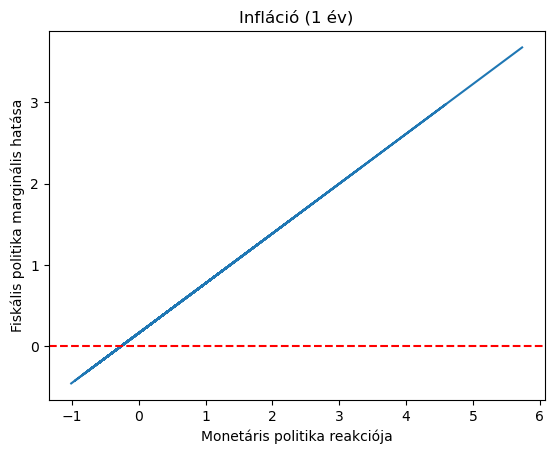

In [6]:
# INTERACTION TERMS - INFLATION

#gross debt, claims

infl_year = 9

res_1 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['kormányzattal szembeni bruttó követelés']] ,infl_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_2 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (bruttó adósság, követelések)']] ,infl_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_3 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (bruttó adósság, követelések)']] ,infl_model2], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_4 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['bruttó adósság']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (bruttó adósság, követelések)']] ,infl_model3], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
stargazer = Stargazer([res_1, res_2, res_3, res_4])
stargazer.show_degrees_of_freedom(False)
stargazer.rename_covariates({'const': 'konstans'})
stargazer.covariate_order(['bruttó adósság', 'kormányzattal szembeni bruttó követelés', 'helikopter interakció (bruttó adósság, követelések)', 'átlagos infláció (2009-2019)', 'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya', 'nettó energiaimport', 'kormányzati hatékonyság index', 'jegybanki alapkamat változás', 'const'])
print(stargazer.render_latex())

betas = res_3.params[1:4]

yaxes_fis = betas[0]+betas[2]*(helicopter['kormányzattal szembeni bruttó követelés']-np.nanmean(helicopter['kormányzattal szembeni bruttó követelés']))
xaxes_fis = (helicopter[['kormányzattal szembeni bruttó követelés']]-np.nanmean(helicopter[['kormányzattal szembeni bruttó követelés']]))/(np.nanvar(helicopter[['kormányzattal szembeni bruttó követelés']])**0.5)

plot=plt.plot(xaxes_fis,yaxes_fis)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Monetáris politika reakciója')
plt.ylabel('Fiskális politika marginális hatása')
plt.title('Infláció (1 év)')

In [ ]:
yaxes_mon = betas[1]+betas[2]*(helicopter['bruttó adósság']-np.nanmean(helicopter['bruttó adósság']))
xaxes_mon = (helicopter[['bruttó adósság']]-np.nanmean(helicopter[['bruttó adósság']]))/(np.nanvar(helicopter[['bruttó adósság']])**0.5)

plot=plt.plot(xaxes_mon,yaxes_mon)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fiskális politika reakciója')
plt.ylabel('Monetáris politika marginális hatása')
plt.title('Infláció (1 év)')

In [9]:
# INTERACTION TERMS - INFLATION

#gov exp, total asset

infl_year = 5

res_1 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['jegybank mérlegfőösszeg']] ,infl_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_2 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (kiadások, mérlegfőösszeg)']] ,infl_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_3 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (kiadások, mérlegfőösszeg)']] ,infl_model2], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_4 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (kiadások, mérlegfőösszeg)']] ,infl_model3], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
stargazer = Stargazer([res_1, res_2, res_3, res_4])
stargazer.show_degrees_of_freedom(False)
stargazer.rename_covariates({'const': 'konstans'})
stargazer.covariate_order(['kormányzati kiadások', 'jegybank mérlegfőösszeg', 'helikopter interakció (kiadások, mérlegfőösszeg)', 'átlagos infláció (2009-2019)', 'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya', 'nettó energiaimport', 'kormányzati hatékonyság index', 'jegybanki alapkamat változás', 'const'])
print(stargazer.render_latex())
print(res_3.summary())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{4}{c}{\textit{Függő változó: infláció 2020}} \
\cr \cline{2-5}
\\[-1.8ex] & (1) & (2) & (3) & (4) \\
\hline \\[-1.8ex]
 kormányzati kiadások & 0.147$^{}$ & -0.117$^{}$ & 0.213$^{}$ & 0.457$^{**}$ \\
& (0.203) & (0.241) & (0.301) & (0.194) \\
 jegybank mérlegfőösszeg & 0.341$^{*}$ & 0.379$^{*}$ & 0.623$^{*}$ & 0.097$^{*}$ \\
& (0.180) & (0.215) & (0.340) & (0.056) \\
 helikopter interakció (kiadások, mérlegfőösszeg) & & 0.050$^{}$ & 0.144$^{}$ & -0.034$^{**}$ \\
& & (0.057) & (0.115) & (0.015) \\
 átlagos infláció (2009-2019) & 2.280$^{**}$ & 2.311$^{**}$ & 2.348$^{**}$ & 0.636$^{***}$ \\
& (1.060) & (1.061) & (0.947) & (0.175) \\
 szolgáltatások (GDP százalékában) & -0.077$^{}$ & -0.073$^{}$ & -0.130$^{}$ & 0.033$^{}$ \\
& (0.086) & (0.083) & (0.101) & (0.063) \\
 Covid lezárás index (stringency) & 0.094$^{}$ & 0.084$^{}$ & 0.197$^{}$ & 0.069$^{}$ \\
& (0.118) & 

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{4}{c}{\textit{Függő változó: infláció 2020}} \
\cr \cline{2-5}
\\[-1.8ex] & (1) & (2) & (3) & (4) \\
\hline \\[-1.8ex]
 kormányzati kiadások & 0.321$^{}$ & 0.202$^{}$ & -0.033$^{}$ & 0.409$^{**}$ \\
& (0.276) & (0.225) & (0.276) & (0.183) \\
 kormányzattal szembeni bruttó követelés & 0.911$^{*}$ & 1.156$^{**}$ & 1.316$^{**}$ & 0.180$^{*}$ \\
& (0.535) & (0.529) & (0.547) & (0.107) \\
 helikopter interakció (kiadások, követelések) & & 0.143$^{*}$ & 0.179$^{**}$ & -0.077$^{***}$ \\
& & (0.075) & (0.082) & (0.027) \\
 átlagos infláció (2009-2019) & 1.973$^{**}$ & 1.967$^{***}$ & 2.035$^{***}$ & 0.588$^{***}$ \\
& (0.786) & (0.620) & (0.607) & (0.159) \\
 szolgáltatások (GDP százalékában) & -0.157$^{}$ & -0.091$^{}$ & -0.093$^{}$ & 0.061$^{}$ \\
& (0.104) & (0.073) & (0.100) & (0.072) \\
 Covid lezárás index (stringency) & 0.099$^{}$ & 0.134$^{}$ & 0.163$^{}$ & 0.057

Text(0.5, 1.0, 'Infláció (1 év)')

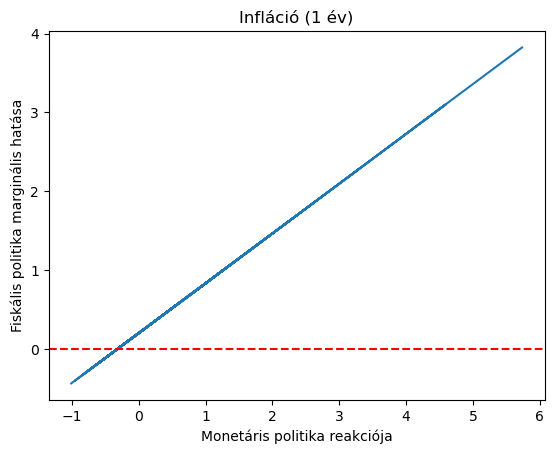

In [4]:
# INTERACTION TERMS - INFLATION

#gov exp, claims

infl_year = 5

res_1 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['kormányzattal szembeni bruttó követelés']] ,infl_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_2 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (kiadások, követelések)']] ,infl_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_3 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (kiadások, követelések)']] ,infl_model2], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_4 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['kormányzati kiadások']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (kiadások, követelések)']] ,infl_model3], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
stargazer = Stargazer([res_1, res_2, res_3, res_4])
stargazer.show_degrees_of_freedom(False)
stargazer.rename_covariates({'const': 'konstans'})
stargazer.covariate_order(['kormányzati kiadások', 'kormányzattal szembeni bruttó követelés', 'helikopter interakció (kiadások, követelések)', 'átlagos infláció (2009-2019)', 'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya', 'nettó energiaimport', 'kormányzati hatékonyság index', 'jegybanki alapkamat változás', 'const'])
print(stargazer.render_latex())

betas = res_2.params[1:4]

yaxes_fis = betas[0]+betas[2]*(helicopter['kormányzattal szembeni bruttó követelés']-np.nanmean(helicopter['kormányzattal szembeni bruttó követelés']))
xaxes_fis = (helicopter[['kormányzattal szembeni bruttó követelés']]-np.nanmean(helicopter[['kormányzattal szembeni bruttó követelés']]))/(np.nanvar(helicopter[['kormányzattal szembeni bruttó követelés']])**0.5)

plot=plt.plot(xaxes_fis,yaxes_fis)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Monetáris politika reakciója')
plt.ylabel('Fiskális politika marginális hatása')
plt.title('Infláció (1 év)')

In [ ]:
yaxes_mon = betas[1]+betas[2]*(helicopter['kormányzati kiadások']-np.nanmean(helicopter['kormányzati kiadások']))
xaxes_mon = (helicopter[['kormányzati kiadások']]-np.nanmean(helicopter[['kormányzati kiadások']]))/(np.nanvar(helicopter[['kormányzati kiadások']])**0.5)

plot=plt.plot(xaxes_mon,yaxes_mon)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fiskális politika reakciója')
plt.ylabel('Monetáris politika marginális hatása')
plt.title('Infláció (1 év)')

In [ ]:
# INTERACTION TERMS - INFLATION

#IMF, total asset

infl_year = 5

res_1 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['jegybank mérlegfőösszeg']] ,infl_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_2 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (IMF, mérlegfőösszeg)']] ,infl_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_3 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (IMF, mérlegfőösszeg)']] ,infl_model2], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_4 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['jegybank mérlegfőösszeg']], helicopter[['helikopter interakció (IMF, mérlegfőösszeg)']] ,infl_model3], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
stargazer = Stargazer([res_1, res_2, res_3, res_4])
stargazer.show_degrees_of_freedom(False)
stargazer.rename_covariates({'const': 'konstans'})
stargazer.covariate_order(['IMF fiskális kiadások (összes)', 'jegybank mérlegfőösszeg', 'helikopter interakció (IMF, mérlegfőösszeg)', 'átlagos infláció (2009-2019)', 'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya', 'nettó energiaimport', 'kormányzati hatékonyság index', 'jegybanki alapkamat változás', 'const'])
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{4}{c}{\textit{Függő változó: infláció (1 év)}} \
\cr \cline{2-5}
\\[-1.8ex] & (1) & (2) & (3) & (4) \\
\hline \\[-1.8ex]
 IMF fiskális kiadások (összes) & 0.024$^{}$ & 0.032$^{}$ & 0.030$^{}$ & 0.051$^{}$ \\
& (0.028) & (0.032) & (0.043) & (0.066) \\
 kormányzattal szembeni bruttó követelés & -0.036$^{}$ & 0.011$^{}$ & 0.008$^{}$ & -0.001$^{}$ \\
& (0.062) & (0.076) & (0.097) & (0.222) \\
 helikopter interakció (IMF, követelések) & & -0.007$^{}$ & -0.006$^{}$ & 0.001$^{}$ \\
& & (0.006) & (0.007) & (0.016) \\
 átlagos infláció (2009-2019) & 0.816$^{***}$ & 0.822$^{***}$ & 0.831$^{***}$ & 0.944$^{***}$ \\
& (0.179) & (0.178) & (0.212) & (0.246) \\
 negyedéves GDP kontroll & -0.837$^{}$ & -0.960$^{}$ & 0.511$^{}$ & -7.216$^{}$ \\
& (2.710) & (2.832) & (3.171) & (5.534) \\
 szolgáltatások (GDP százalékában) & 0.008$^{}$ & 0.010$^{}$ & 0.004$^{}$ & -0.000$^{}$ \\
& (

Text(0.5, 1.0, 'Infláció (1 év)')

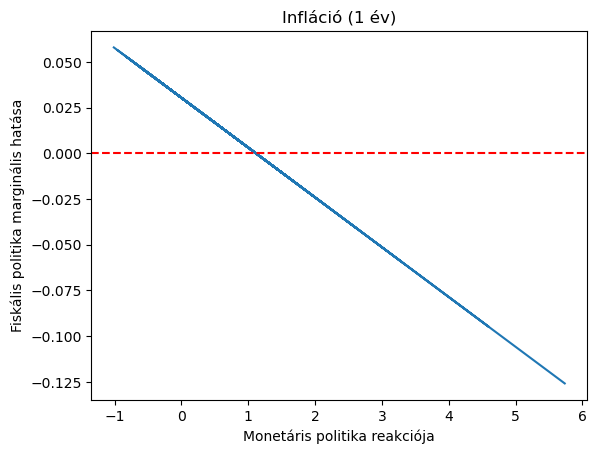

In [18]:
# INTERACTION TERMS - INFLATION

#IMF, claims

infl_year = 7

res_1 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['kormányzattal szembeni bruttó követelés']] ,infl_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_2 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (IMF, követelések)']] ,infl_model1], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_3 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (IMF, követelések)']] ,infl_model2], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
res_4 = sm.OLS(heli_y.iloc[:,infl_year], sm.add_constant(pd.concat([helicopter[['IMF fiskális kiadások (összes)']], helicopter[['kormányzattal szembeni bruttó követelés']], helicopter[['helikopter interakció (IMF, követelések)']] ,infl_model3], axis=1)), missing='drop').fit(cov_type='HC1', use_t=True)
stargazer = Stargazer([res_1, res_2, res_3, res_4])
stargazer.show_degrees_of_freedom(False)
stargazer.rename_covariates({'const': 'konstans'})
stargazer.covariate_order(['IMF fiskális kiadások (összes)', 'kormányzattal szembeni bruttó követelés', 'helikopter interakció (IMF, követelések)', 'átlagos infláció (2009-2019)', 'negyedéves GDP kontroll', 'szolgáltatások (GDP százalékában)', 'Covid lezárás index (stringency)', 'összes halál (1000 főre jutó)', '65 évnél idősebbek aránya', 'nettó energiaimport', 'kormányzati hatékonyság index', 'jegybanki alapkamat változás', 'const'])
print(stargazer.render_latex())

betas = res_3.params[1:4]

yaxes_fis = betas[0]+betas[2]*(helicopter['kormányzattal szembeni bruttó követelés']-np.nanmean(helicopter['kormányzattal szembeni bruttó követelés']))
xaxes_fis = (helicopter[['kormányzattal szembeni bruttó követelés']]-np.nanmean(helicopter[['kormányzattal szembeni bruttó követelés']]))/(np.nanvar(helicopter[['kormányzattal szembeni bruttó követelés']])**0.5)

plot=plt.plot(xaxes_fis,yaxes_fis)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Monetáris politika reakciója')
plt.ylabel('Fiskális politika marginális hatása')
plt.title('Infláció (1 év)')

In [ ]:
yaxes_mon = betas[1]+betas[2]*(helicopter['IMF fiskális kiadások (összes)']-np.nanmean(helicopter['IMF fiskális kiadások (összes)']))
xaxes_mon = (helicopter[['IMF fiskális kiadások (összes)']]-np.nanmean(helicopter[['IMF fiskális kiadások (összes)']]))/(np.nanvar(helicopter[['IMF fiskális kiadások (összes)']])**0.5)

plot=plt.plot(xaxes_mon,yaxes_mon)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fiskális politika reakciója')
plt.ylabel('Monetáris politika marginális hatása')
plt.title('Infláció (1 év)')